In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [2]:
from core.config import CONFIG

if __name__ == "__main__":
    CONFIG.load_config("config.yaml")

    print("Training Dataset Path:", CONFIG.dataset_path("training"))
    print("Evaluation Dataset Path:", CONFIG.dataset_path("evaluation"))
    print("IEMOCAP Preprocessed Dir:", CONFIG.dataset_preprocessed_dir_path(CONFIG.training_dataset_name()))
    print("CREMA-D Preprocessed Dir:", CONFIG.dataset_preprocessed_dir_path(CONFIG.evaluation_dataset_name()))
    print("IEMOCAP Emotions:", CONFIG.dataset_emotions(CONFIG.training_dataset_name()))
    print("CREMA-D Emotions:", CONFIG.dataset_emotions(CONFIG.evaluation_dataset_name()))

Training Dataset Path: E:/Unitec/SER/audio\dataset\IEMOCAP
Evaluation Dataset Path: E:/Unitec/SER/audio\dataset\CREMA-D
IEMOCAP Preprocessed Dir: E:/Unitec/SER/audio\dataset\IEMOCAP\Preprocessed
CREMA-D Preprocessed Dir: E:/Unitec/SER/audio\dataset\CREMA-D\Preprocessed
IEMOCAP Emotions: ['ang', 'neu', 'sad', 'hap']
CREMA-D Emotions: ['ang', 'neu', 'sad', 'hap']


## test processing

In [1]:
import warnings
warnings.filterwarnings('ignore')
from core.config import CONFIG
from preprocessing.iemocap import IemocapPreprocessor

# 确保 CONFIG 已经加载了配置文件
CONFIG.load_config("config.yaml")

# 初始化 IemocapPreprocessor，使用配置中训练数据集的路径
# 假设您想验证训练数据的加载
iemocap_dataset_path = CONFIG.dataset_path("training")
iemocap_preprocessor = IemocapPreprocessor(iemocap_dataset_path)

# 生成 DataFrame
iemocap_df = iemocap_preprocessor.generate_dataframe()

# 显示 DataFrame 的前几行
print("DataFrame head:")
display(iemocap_df.head())

# 您还可以打印一些关于 DataFrame 的信息来进一步验证
print("\nDataFrame Info:")
iemocap_df.info()

print("\nEmotion Distribution:")
display(iemocap_df['emotion'].value_counts())

print("\nData per Session:")
display(iemocap_df['session'].value_counts())

[INFO] Target emotions being extracted: ['ang', 'neu', 'sad', 'hap']

[INFO] Preprocessing complete. Total entries extracted: 4490
[INFO] Emotion distribution:
emotion
neu    1708
ang    1103
sad    1084
hap     595
Name: count, dtype: int64

[INFO] Data per session:
session
Session3    1000
Session1     942
Session5     942
Session2     813
Session4     793
Name: count, dtype: int64
DataFrame head:


,audio_path,audio_filename,text,emotion,session
0,E:/Unitec/SER/audio\dataset\IEMOCAP\Session1\s...,Ses01F_impro01_F000.wav,Excuse me.,neu,Session1
1,E:/Unitec/SER/audio\dataset\IEMOCAP\Session1\s...,Ses01F_impro01_F001.wav,Yeah.,neu,Session1
2,E:/Unitec/SER/audio\dataset\IEMOCAP\Session1\s...,Ses01F_impro01_F002.wav,Is there a problem?,neu,Session1
3,E:/Unitec/SER/audio\dataset\IEMOCAP\Session1\s...,Ses01F_impro01_F005.wav,Well what's the problem? Let me change it.,neu,Session1
4,E:/Unitec/SER/audio\dataset\IEMOCAP\Session1\s...,Ses01F_impro01_F012.wav,That's out of control.,ang,Session1



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490 entries, 0 to 4489
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   audio_path      4490 non-null   object
 1   audio_filename  4490 non-null   object
 2   text            4490 non-null   object
 3   emotion         4490 non-null   object
 4   session         4490 non-null   object
dtypes: object(5)
memory usage: 175.5+ KB

Emotion Distribution:


emotion
neu    1708
ang    1103
sad    1084
hap     595
Name: count, dtype: int64


Data per Session:


session
Session3    1000
Session1     942
Session5     942
Session2     813
Session4     793
Name: count, dtype: int64

In [2]:

from preprocessing.cremad import CremaDPreprocessor

# 假设您想验证训练数据的加载
cremad_dataset_path = CONFIG.dataset_path("evaluation")
cremad_preprocessor = CremaDPreprocessor(cremad_dataset_path)

# 生成 DataFrame
cremad_df = cremad_preprocessor.generate_dataframe()

# 显示 DataFrame 的前几行
print("DataFrame head:")
display(cremad_df.head())

# 您还可以打印一些关于 DataFrame 的信息来进一步验证
print("\nDataFrame Info:")
cremad_df.info()

print("\nEmotion Distribution:")
display(cremad_df['emotion'].value_counts())

print("\nData per speaker:")
display(cremad_df['speaker'].value_counts())

[INFO] Target emotions being extracted for CREMA-D: ['ang', 'neu', 'sad', 'hap']

[INFO] CREMA-D Preprocessing complete. Total entries extracted: 4900
[INFO] Emotion distribution for CREMA-D:
emotion
ang    1271
hap    1271
sad    1271
neu    1087
Name: count, dtype: int64

[INFO] Data per Speaker:
speaker
1001    54
1003    54
1004    54
1011    54
1005    54
        ..
1002    53
1076    53
1019    50
1009    50
1008    50
Name: count, Length: 91, dtype: int64
DataFrame head:


,audio_path,audio_filename,text,emotion,speaker
0,E:/Unitec/SER/audio\dataset\CREMA-D\AudioWAV\1...,1001_DFA_ANG_XX.wav,Don't forget a jacket,ang,1001
1,E:/Unitec/SER/audio\dataset\CREMA-D\AudioWAV\1...,1001_DFA_HAP_XX.wav,Don't forget a jacket,hap,1001
2,E:/Unitec/SER/audio\dataset\CREMA-D\AudioWAV\1...,1001_DFA_NEU_XX.wav,Don't forget a jacket,neu,1001
3,E:/Unitec/SER/audio\dataset\CREMA-D\AudioWAV\1...,1001_DFA_SAD_XX.wav,Don't forget a jacket,sad,1001
4,E:/Unitec/SER/audio\dataset\CREMA-D\AudioWAV\1...,1001_IEO_ANG_HI.wav,It's eleven o'clock,ang,1001



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   audio_path      4900 non-null   object
 1   audio_filename  4900 non-null   object
 2   text            4900 non-null   object
 3   emotion         4900 non-null   object
 4   speaker         4900 non-null   object
dtypes: object(5)
memory usage: 191.5+ KB

Emotion Distribution:


emotion
ang    1271
hap    1271
sad    1271
neu    1087
Name: count, dtype: int64


Data per speaker:


speaker
1001    54
1003    54
1004    54
1011    54
1005    54
        ..
1002    53
1076    53
1019    50
1009    50
1008    50
Name: count, Length: 91, dtype: int64

### lenth of wav

In [3]:
# Print the length of each waveform in the dataframe
import torchaudio
import pandas as pd
import numpy as np
def print_waveform_lengths(df, dataset_name):
    print(f"{dataset_name} Waveform Lengths:")
    waveform_lengths = []

    # Use apply to get the length of each waveform
    for idx, row in df.iterrows():
        try:
            # Load the audio file and get its length
            waveform, sample_rate = torchaudio.load(row['audio_path'])
            length_in_samples = waveform.shape[1]  # Assuming shape is [channels, samples]
            length_in_seconds = length_in_samples / sample_rate
            waveform_lengths.append({
                'index': idx, 
                'length_samples': length_in_samples, 
                'length_seconds': length_in_seconds,
                'audio_path': row['audio_path']
            })
        except Exception as e:
            print(f"Error processing file {row['audio_path']}: {e}")

    # Convert to DataFrame for better visualization
    lengths_df = pd.DataFrame(waveform_lengths)

    # Display summary statistics
    print("\nSummary Statistics (in seconds):")
    print(lengths_df['length_seconds'].describe())

print_waveform_lengths(iemocap_df, "IEMOCAP")
print("\n"+"-" * 20 + "\n")
print_waveform_lengths(cremad_df, "CREMA-D")


# You could also do the same for CREMA-D

IEMOCAP Waveform Lengths:

Summary Statistics (in seconds):
count    4490.000000
mean        4.495215
std         3.171135
min         0.730000
25%         2.321250
50%         3.509937
75%         5.699937
max        31.910000
Name: length_seconds, dtype: float64

--------------------

CREMA-D Waveform Lengths:

Summary Statistics (in seconds):
count    4900.000000
mean        2.489760
std         0.478087
min         1.334688
25%         2.168813
50%         2.435750
75%         2.769437
max         5.005000
Name: length_seconds, dtype: float64


### tokenizer of text

def analyze_text_lengths(dataset_name, df):
    print(f"\n--- {dataset_name} 文本长度分析 ---")
含义：定义一个分析函数，传入数据集名字和含有文本列的 DataFrame。

目的：分数据集输出统计摘要，便于横向对比（比如 IEMOCAP vs CREMA-D）。

设计思考：多数据集循环复用时，打印标题更清晰。

python
复制代码
    # 计算token长度
    token_lengths = []
    for text in df['text']:
        tokens = tokenizer(text, padding=False, truncation=False)
        token_lengths.append(len(tokens['input_ids']))
含义：对每一条文本调用 HuggingFace 的 tokenizer，取 input_ids 长度。

原理：

tokenizer 会做子词分词（BPE / WordPiece / SentencePiece），把句子拆成 token 并映射到 id。

默认 add_special_tokens=True，因此单句会被包上 [CLS] / [SEP]（BERT/DeBERTa）或 <s> / </s>（RoBERTa）等特殊符号。

padding=False：不补齐，得到真实长度；truncation=False：不截断，保留尾部，便于看极值/百分位。

理论依据：

Transformer 的时间/显存复杂度 ~ O(L²)（多头自注意力），L 越大成本越高；

设定 max_length=L_text 需要知道数据真实分布，以避开不必要的 padding 和减少截断带来的信息损失。

设计思考：

计数时包含特殊符号是对的，因为训练/推理时真实长度就包含它们；

如果你想分析“纯内容 token”长度，可再做一版 add_special_tokens=False 的统计（下方我给改进版）。

python
复制代码
    # 转为 Series 便于分析
    lengths_series = pd.Series(token_lengths)
含义：用 pandas 便于做统计、画图、导出。

目的：后续 describe、分组统计、保存报告都很方便。

python
复制代码
    # 显示统计摘要
    print("Token长度统计:")
    stats = lengths_series.describe(percentiles=[.5, .75, .9, .95, .99])
    print(stats)
含义：输出计数、均值、标准差、min/max、以及 50/75/90/95/99 分位点。

目的：

P95/P99 是选 L_text 的关键参考：

若 P95 = 62，多半可以把 L_text 设为 64；

若 P99 = 123，则设 128 保险；

也能看尾部是不是长尾严重（决定是否做长文本策略：滑窗、截断规则等）。

理论依据：

长度分布—资源权衡：把 L_text 设在 P95 附近通常能显著省内存，且仅截断极少数样本；

如果任务对完整性很敏感（如问答），可设在 P99；SER 转写通常较短，P95 足够。


--- IEMOCAP 文本长度分析 ---
Token长度统计:
count    4490.000000
mean       17.435857
std        12.742214
min         3.000000
50%        14.000000
75%        23.000000
90%        34.000000
95%        43.000000
99%        61.000000
max       115.000000
dtype: float64

分位数分布:
50% 的样本 token 长度 <= 14
75% 的样本 token 长度 <= 23
90% 的样本 token 长度 <= 34
95% 的样本 token 长度 <= 43
99% 的样本 token 长度 <= 61

--- CREMA-D 文本长度分析 ---
Token长度统计:
count    4900.000000
mean        8.774898
std         1.546893
min         6.000000
50%         9.000000
75%        10.000000
90%        11.000000
95%        11.000000
99%        11.000000
max        11.000000
dtype: float64

分位数分布:
50% 的样本 token 长度 <= 9
75% 的样本 token 长度 <= 10
90% 的样本 token 长度 <= 11
95% 的样本 token 长度 <= 11
99% 的样本 token 长度 <= 11

--- 综合分析 ---
95% 分位数: 34
99% 分位数: 54


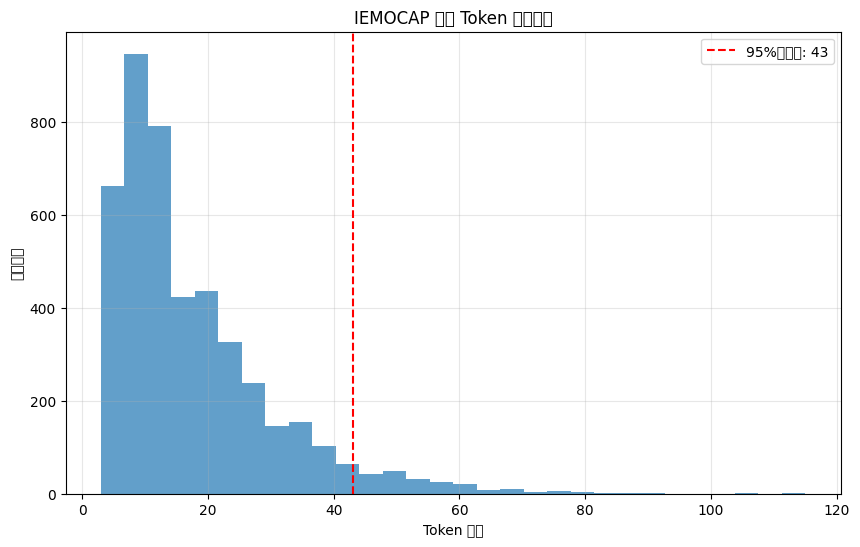

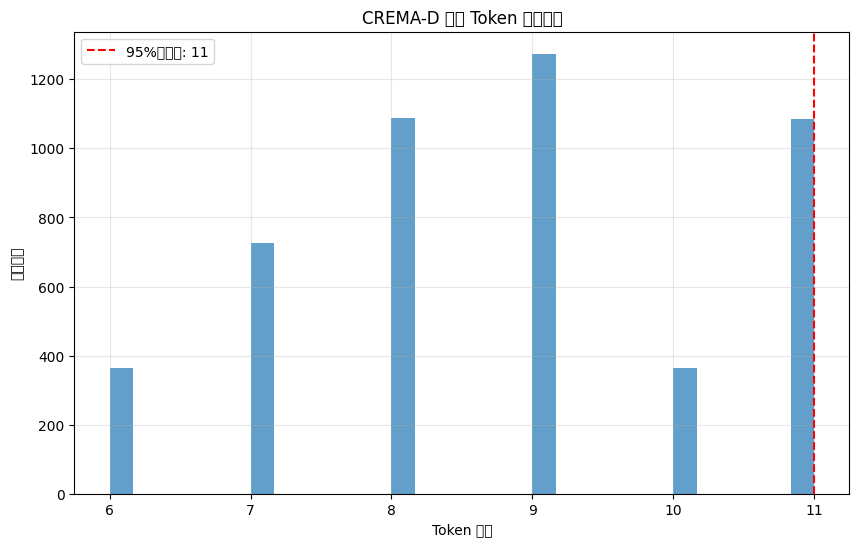

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from core.config import CONFIG

# 加载配置
CONFIG.load_config("config.yaml")

# 使用与模型相匹配的分词器
tokenizer = AutoTokenizer.from_pretrained(CONFIG.text_encoder_name())

# 分析数据集的文本长度
def analyze_text_lengths(dataset_name, df):
    print(f"\n--- {dataset_name} 文本长度分析 ---")
    
    # 计算token长度
    token_lengths = []
    for text in df['text']:
        tokens = tokenizer(text, padding=False, truncation=False)
        token_lengths.append(len(tokens['input_ids']))
    
    # 转为 Series 便于分析
    lengths_series = pd.Series(token_lengths)
    
    # 显示统计摘要
    print("Token长度统计:")
    stats = lengths_series.describe(percentiles=[.5, .75, .9, .95, .99])
    print(stats)
    
    # 显示分位数
    print("\n分位数分布:")
    for p in [50, 75, 90, 95, 99]:
        print(f"{p}% 的样本 token 长度 <= {np.percentile(token_lengths, p):.0f}")
    
    # 绘制直方图
    plt.figure(figsize=(10, 6))
    plt.hist(token_lengths, bins=30, alpha=0.7)
    plt.axvline(np.percentile(token_lengths, 95), color='r', linestyle='--', 
                label=f'95%分位数: {np.percentile(token_lengths, 95):.0f}')
    plt.title(f'{dataset_name} 文本 Token 长度分布')
    plt.xlabel('Token 长度')
    plt.ylabel('样本数量')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    return token_lengths

# 分析 IEMOCAP 数据集
iemocap_token_lengths = analyze_text_lengths("IEMOCAP", iemocap_df)

# 分析 CREMA-D 数据集
cremad_token_lengths = analyze_text_lengths("CREMA-D", cremad_df)

# 整合两个数据集的统计结果，找到合适的截断点
all_lengths = iemocap_token_lengths + cremad_token_lengths
print("\n--- 综合分析 ---")
print(f"95% 分位数: {np.percentile(all_lengths, 95):.0f}")
print(f"99% 分位数: {np.percentile(all_lengths, 99):.0f}")

## 实例化数据集


In [1]:
from core.config import CONFIG
from scripts.get_dataloaders import get_dataloaders
CONFIG.load_config("config.yaml")

# --- 训练和验证流程 ---
print("加载 IEMOCAP 数据集用于训练...")
# 只需一行代码，即可获取训练和验证所需的所有 dataloader
iemocap_loaders = get_dataloaders(CONFIG.training_dataset_name())
train_loader = iemocap_loaders['train']
validation_loader = iemocap_loaders['validation']

e:\Unitec\SER\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


加载 IEMOCAP 数据集用于训练...
--- 正在为数据集 'IEMOCAP' 准备Dataloaders (实时处理模式) ---
[INFO] 已从以下路径加载原始数据信息: E:/Unitec/SER/dataset\IEMOCAP\Preprocessed\iemocap_raw.pkl
[INFO] 使用的 processor 类型: <class 'transformers.models.wav2vec2.feature_extraction_wav2vec2.Wav2Vec2FeatureExtractor'>


### train baseline model（New）



In [ ]:
# Rerun the training cell
import os
import torch
import gc
from core.config import CONFIG, device
from scripts.get_dataloaders import get_dataloaders
from audio.baseline_model import AudioBaselineModel
from audio.trainer import MemoryOptimizedAudioBaselineTrainer

# 设置CUDA内存优化
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
torch.cuda.empty_cache()
gc.collect()

CONFIG.load_config("config.yaml")

# --- 训练和验证流程 ---
training_dataset_name = CONFIG.training_dataset_name()
print(f"\n--- 正在加载 '{training_dataset_name}' 数据集用于训练和验证 ---")

# 使用内存优化版本的dataloaders（这是主要的改动）
try:
    # 使用内存优化版本
    iemocap_loaders = get_dataloaders(training_dataset_name, use_memory_optimization=True)
    train_loader = iemocap_loaders['train']
    validation_loader = iemocap_loaders['validation']
    
    # --- 零样本评估流程 (在 CREMA-D 上) ---
    evaluation_dataset_name = CONFIG.evaluation_dataset_name()
    print(f"\n--- 正在加载 '{evaluation_dataset_name}' 数据集用于零样本评估 ---")
    
    cremad_loaders = get_dataloaders(evaluation_dataset_name, use_memory_optimization=True)
    evaluation_loader = cremad_loaders['evaluation']
    
    # --- 实例化模型和训练器 ---
    print("\n--- 初始化基线模型和训练器 ---")
    
    # 清理内存后创建模型
    torch.cuda.empty_cache()
    gc.collect()
    
    # 获取情感标签
    iemocap_emotions = CONFIG.dataset_emotions(training_dataset_name)
    num_labels = len(iemocap_emotions)
    
    # 创建模型（考虑使用更小的batch_size)
    baseline_model = AudioBaselineModel(num_labels=num_labels).to(device)
    
    # 使用内存优化版本的训练器
    baseline_trainer = MemoryOptimizedAudioBaselineTrainer(  # 使用新的训练器
        model=baseline_model,
        num_epochs=CONFIG.training_epochs(),
        learning_rate=CONFIG.learning_rate() * 4,  # 由于梯度累积，需要调整学习率
        optimizer_type=CONFIG.optimizer_type(),
        gradient_accumulation_steps=8  # 梯度累积步数，可以根据需要调整
    )
    
    # --- 步骤 3: 训练模型 ---
    print("\n--- 开始在 IEMOCAP 上训练基线模型 ---")
    baseline_trainer.train(train_loader)
    
    # --- 步骤 4: 在 IEMOCAP 验证集上评估 ---
    print("\n--- 在 IEMOCAP 验证集上评估模型性能 ---")
    baseline_trainer.eval(validation_loader, labels=iemocap_emotions)
    
    # --- 步骤 5: 在 CREMA-D 测试集上进行零样本评估 ---
    print("\n--- 在 CREMA-D 测试集上进行零样本评估 ---")
    cremad_emotions = CONFIG.dataset_emotions(evaluation_dataset_name)
    baseline_trainer.eval(evaluation_loader, labels=cremad_emotions)
    
    print("\n--- 基线模型训练和评估完成！ ---")

except torch.cuda.OutOfMemoryError as e:
    print(f"\n[ERROR] CUDA内存不足: {e}")
    print("建议:")
    print("1. 进一步减小batch_size到1")
    print("2. 减少音频最大长度")
    print("3. 使用更小的模型variant")
    print("4. 重启运行时清理内存")
    
    # 清理内存
    torch.cuda.empty_cache()
    gc.collect()
    
except Exception as e:
    print(f"\n[ERROR] 训练过程中出现错误: {e}")
    torch.cuda.empty_cache()
    gc.collect()
    raise e

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



--- 正在加载 'IEMOCAP' 数据集用于训练和验证 ---
--- 正在为数据集 'IEMOCAP' 准备Dataloaders ---
[INFO] 使用内存优化模式
[INFO] 已从以下路径加载音频特征: E:/Iris_project/SER\dataset\IEMOCAP\Preprocessed\iemocap_audio_features.pkl
[INFO] 已从以下路径加载文本Tokens: E:/Iris_project/SER\dataset\IEMOCAP\Preprocessed\iemocap_text_tokens.pkl
[INFO] 使用内存优化的数据整理器
[INFO] 已清理加载过程中的临时内存

--- 正在加载 'CREMA-D' 数据集用于零样本评估 ---
--- 正在为数据集 'CREMA-D' 准备Dataloaders ---
[INFO] 使用内存优化模式
[INFO] 已从以下路径加载音频特征: E:/Iris_project/SER\dataset\CREMA-D\Preprocessed\crema-d_audio_features.pkl
[INFO] 已从以下路径加载文本Tokens: E:/Iris_project/SER\dataset\CREMA-D\Preprocessed\crema-d_text_tokens.pkl
[INFO] 使用内存优化的数据整理器
[INFO] 已清理加载过程中的临时内存

--- 初始化基线模型和训练器 ---


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of WavLMForSequenceClassification were not initialized from the model checkpoint at microsoft/wavlm-base and are newly initialized: ['projector.bias', 'projector.weight', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1158: UserWarning: expandable_segments not supported on this platform (Triggered internally at ..\c10\cuda\CUDACachingAll

[INFO] 特征提取层已冻结，使用梯度累积步数: 8

--- 开始在 IEMOCAP 上训练基线模型 ---


Epoch 1:   0%|          | 0/449 [00:00<?, ?it/s]

### check cuda

In [2]:
import torch
import sys

print("--- 1. Check PyTorch and CUDA ---")
print(f"Python Version: {sys.version}")
print(f"PyTorch Version: {torch.__version__}")

# Check if CUDA is available
is_cuda_available = torch.cuda.is_available()
print(f"Is CUDA available: {is_cuda_available}")

if not is_cuda_available:
    print("\n[ERROR] PyTorch could not detect CUDA. Please check your NVIDIA driver and PyTorch installation.")
    # If CUDA is not available, exit the script
    sys.exit()

print("\n--- 2. Get GPU Device Information ---")
# Get the default CUDA device (usually GPU 0)
device = torch.device("cuda:0")
print(f"Default CUDA device: {device}")

# Print the name of the GPU
gpu_name = torch.cuda.get_device_name(0)
print(f"GPU Name: {gpu_name}")

# Print the CUDA version PyTorch was compiled with
torch_cuda_version = torch.version.cuda
print(f"PyTorch compiled with CUDA version: {torch_cuda_version}")


print("\n--- 3. Test Data Transfer Between CPU and GPU ---")
# a. Create a tensor on the CPU
cpu_tensor = torch.tensor([1, 2, 3], device='cpu')
print(f"a. Tensor created on the CPU: {cpu_tensor}")
print(f"   - Device: {cpu_tensor.device}")

# b. Try to move the tensor to the GPU
try:
    gpu_tensor = cpu_tensor.to(device)
    print(f"\nb. Successfully moved tensor to GPU: {gpu_tensor}")
    print(f"   - Device: {gpu_tensor.device}")
except Exception as e:
    print(f"\n[ERROR] Failed to move data to GPU: {e}")
    sys.exit()


print("\n--- 4. Test Computation on GPU ---")
# a. Create two tensors on the GPU for computation
try:
    a = torch.randn(3, 3).to(device)
    b = torch.randn(3, 3).to(device)
    print(f"a. Created two 3x3 random tensors on the GPU.")
    print(f"   - Tensor a device: {a.device}")
    print(f"   - Tensor b device: {b.device}")

    # b. Perform matrix multiplication on the GPU
    print("\nb. Performing matrix multiplication on GPU (c = a * b)...")
    c = torch.matmul(a, b)
    print(f"   - Result c device: {c.device}")
    print(f"   - Computation successful!")

except Exception as e:
    print(f"\n[ERROR] Computation on GPU failed: {e}")
    sys.exit()

print("\n--- 5. Test Moving Result Back to CPU ---")
# a. Move the computation result from GPU back to CPU
try:
    result_cpu_tensor = c.cpu()
    print("a. Successfully moved the computation result back to the CPU.")
    print(f"   - Device: {result_cpu_tensor.device}")
    print("\nComputation result:")
    print(result_cpu_tensor)

except Exception as e:
    print(f"\n[ERROR] Failed to move result back to CPU: {e}")
    sys.exit()


print("\n--- All tests completed ---")
print("[SUCCESS] Your PyTorch and CUDA environment is configured correctly, and they can communicate and perform computations normally!")

--- 1. Check PyTorch and CUDA ---
Python Version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
PyTorch Version: 2.1.2+cu121
Is CUDA available: True

--- 2. Get GPU Device Information ---
Default CUDA device: cuda:0
GPU Name: NVIDIA L40S-6Q
PyTorch compiled with CUDA version: 12.1

--- 3. Test Data Transfer Between CPU and GPU ---
a. Tensor created on the CPU: tensor([1, 2, 3])
   - Device: cpu

[ERROR] Failed to move data to GPU: CUDA error: operation not supported
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



SystemExit: 

### （pass）

In [1]:
import torch
from core.config import CONFIG, device
from scripts.get_dataloaders import get_dataloaders
from audio.baseline_model import AudioBaselineModel
from audio.trainer import AudioBaselineTrainer

def main():
    """
    主函数，用于执行声学基线模型的完整训练和评估流程。
    """
    # 1. 加载配置文件
    CONFIG.load_config("config.yaml")
    print(f"--- 实验配置已加载 ---")
    print(f"使用的设备: {device}")

    # --- 训练和验证流程 ---
    training_dataset_name = CONFIG.training_dataset_name()
    print(f"\n--- 正在加载 '{training_dataset_name}' 数据集用于训练和验证 ---")
    
    # 使用高级函数获取训练和验证所需的所有 dataloader
    iemocap_loaders = get_dataloaders(training_dataset_name)
    train_loader = iemocap_loaders['train']
    validation_loader = iemocap_loaders['validation']

    # 3. 初始化模型
    # 从配置中获取情感标签列表，以确定模型的输出维度
    num_labels = len(CONFIG.dataset_emotions(training_dataset_name))
    print(f"\n--- 正在初始化 AudioBaselineModel (类别数: {num_labels}) ---")
    model = AudioBaselineModel(num_labels=num_labels).to(device)

    # 4. 初始化训练器
    print(f"--- 正在初始化 AudioBaselineTrainer ---")
    trainer = AudioBaselineTrainer(
        model=model,
        num_epochs=CONFIG.training_epochs(),
        learning_rate=CONFIG.learning_rate(),
        optimizer_type=CONFIG.optimizer_type()
    )

    # 5. 开始训练
    trainer.train(train_loader)

    # 6. 在验证集上评估
    print(f"\n--- 正在 '{training_dataset_name}' 的验证集上进行评估 ---")
    trainer.eval(validation_loader, labels=CONFIG.dataset_emotions(training_dataset_name))

    # --- 零样本评估流程 (在 CREMA-D 上) ---
    evaluation_dataset_name = CONFIG.evaluation_dataset_name()
    print(f"\n--- 正在加载 '{evaluation_dataset_name}' 数据集用于零样本评估 ---")
    
    cremad_loaders = get_dataloaders(evaluation_dataset_name)
    evaluation_loader = cremad_loaders['evaluation']
    
    print(f"\n--- 正在 '{evaluation_dataset_name}' 上进行零样本评估 ---")
    trainer.eval(evaluation_loader, labels=CONFIG.dataset_emotions(evaluation_dataset_name))
    
    print("\n--- 训练和评估流程全部完成 ---")


if __name__ == "__main__":
    main()


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RuntimeError: CUDA error: operation not supported
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [6]:

# --- 第 1 步: 加载必要的库和你的自定义类 ---
import torch
from torch.utils.data import DataLoader
from transformers import Wav2Vec2FeatureExtractor, DebertaV2Tokenizer
import os

from dataloaders.dataset import CustomSERDataset
from scripts.get_dataloaders import CustomDataCollator


# --- 确定计算设备 ---
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# --- 第 2 步: 初始化处理器和分词器 ---
# 这些是collator需要的 "工具"
audio_processor = Wav2Vec2FeatureExtractor.from_pretrained(CONFIG.audio_encoder_name())
text_tokenizer = DebertaV2Tokenizer.from_pretrained(CONFIG.text_encoder_name())

# --- 第 3 步: 实例化训练数据集 (IEMOCAP) ---
# 注意：你需要先运行你的预处理脚本，生成统一的元数据文件


# 定义最大长度 (例如10秒)
MAX_LEN_IN_SECONDS = 10
max_audio_len = 16000 * MAX_LEN_IN_SECONDS

iemocap_emotions = CONFIG.dataset_emotions(CONFIG.training_dataset_name())
train_dataset = CustomSERDataset(
    metadata_file_path=os.path.join(CONFIG.dataset_preprocessed_dir_path(CONFIG.training_dataset_name()),iemocap_metadata_filename), # 使用配置和生成的文件名
    emotions=iemocap_emotions,
    target_sample_rate=audio_processor.sampling_rate,
    split='train',
    max_audio_length=max_audio_len # 传入参数
)

# 创建IEMOCAP验证数据集
val_dataset = CustomSERDataset(
    metadata_file_path=os.path.join(CONFIG.dataset_preprocessed_dir_path(CONFIG.training_dataset_name()),iemocap_metadata_filename),
    emotions=iemocap_emotions,
    target_sample_rate=audio_processor.sampling_rate,
    split='val',
    max_audio_length=max_audio_len # 传入参数
)

# --- 第 4 步: 实例化评估数据集 (CREMA-D) ---
cremad_emotions = CONFIG.dataset_emotions(CONFIG.evaluation_dataset_name())
eval_dataset = CustomSERDataset(
    metadata_file_path=os.path.join(CONFIG.dataset_preprocessed_dir_path(CONFIG.evaluation_dataset_name()),cremad_metadata_filename), # 使用配置和生成的文件名
    emotions=cremad_emotions,
    target_sample_rate=audio_processor.sampling_rate,
    max_audio_length=max_audio_len # 传入参数
)


# --- 第 5 步: 实例化你的数据整理器 ---
# 数据整理器对于训练集和评估集是通用的
data_collator = CustomDataCollator(
    audio_processor=audio_processor,
    text_tokenizer=text_tokenizer,
    # device=device # device 来自你的CONFIG或Notebook顶部定义
)

# --- 第 6 步: 创建训练集的 DataLoader ---
train_dataloader = DataLoader(
    train_dataset,
    batch_size=CONFIG.dataloader_dict()['batch_size'],
    shuffle=True, # 训练集通常需要打乱
    collate_fn=data_collator, # 关键！在这里传入你的自定义整理器
    # num_workers=CONFIG.dataloader_dict()['num_workers'],
    # pin_memory=True
)
val_dataloader = DataLoader(
    val_dataset, 
    batch_size=CONFIG.dataloader_dict()['batch_size'], 
    shuffle=False, 
    collate_fn=data_collator, 
    # num_workers=CONFIG.dataloader_dict()['num_workers'], 
    # pin_memory=True
)

# --- 验证batch size ---
print(train_dataloader.batch_size)

# --- 第 7 步: 创建评估集的 DataLoader ---
eval_dataloader = DataLoader(
    eval_dataset,
    batch_size=CONFIG.dataloader_dict()['batch_size'],
    shuffle=False, # 评估集通常不需要打乱
    collate_fn=data_collator, # 关键！在这里传入你的自定义整理器
    # num_workers=CONFIG.dataloader_dict()['num_workers'],
    # pin_memory=True
)





Using device: cuda
已创建训练集，包含 3592 个样本。
已创建验证集，包含 898 个样本。
已创建训练集，包含 3920 个样本。
32


In [7]:
# --- 第 8 步 (验证): 精确定位问题的详细调试 ---
print("--- 验证 DataLoader 和 Collator (详细调试模式) ---")
print("\n验证训练集 DataLoader:")

# 初始化一个空的 gpu_batch 字典
gpu_batch = {}
try:
    # 1. 获取 CPU 批次 (这一步已经成功)
    cpu_batch = next(iter(train_dataloader))
    print("成功从 DataLoader 获取 CPU 批次。")

    # 2. 逐个检查并移动张量
    print("\n开始逐个将张量移动到 GPU...")

    # 检查 'audio_input_values'
    key = 'audio_input_values'
    tensor = cpu_batch[key]
    print(f"准备移动 '{key}'... | 类型: {tensor.dtype} | 形状: {tensor.shape}")
    gpu_batch[key] = tensor.to(device)
    print(f"'{key}' 移动成功！")

    # 检查 'text_input_ids'
    key = 'text_input_ids'
    tensor = cpu_batch[key]
    print(f"准备移动 '{key}'... | 类型: {tensor.dtype} | 形状: {tensor.shape}")
    gpu_batch[key] = tensor.to(device)
    print(f"'{key}' 移动成功！")

    # 检查 'text_attention_mask'
    key = 'text_attention_mask'
    tensor = cpu_batch[key]
    print(f"准备移动 '{key}'... | 类型: {tensor.dtype} | 形状: {tensor.shape}")
    gpu_batch[key] = tensor.to(device)
    print(f"'{key}' 移动成功！")

    # 检查 'labels'
    key = 'labels'
    tensor = cpu_batch[key]
    print(f"准备移动 '{key}'... | 类型: {tensor.dtype} | 形状: {tensor.shape}")
    gpu_batch[key] = tensor.to(device)
    print(f"'{key}' 移动成功！")

    print("\n所有张量均已成功移动到 GPU！")

except Exception as e:
    # 如果出错，我们会明确知道是在处理哪个 key 时发生的
    print(f"\n在尝试移动 '{key}' 张量时出错: {e}")

# --- 第 8 步 (验证): 从DataLoader中取出一个批次，检查其内容 ---
print("--- 验证 DataLoader 和 Collator ---")
print("\n验证训练集 DataLoader:")
try:
    first_train_batch = next(iter(train_dataloader))
    print("成功从训练集 DataLoader 获取一个批次！")
    print("批次包含的键:", first_train_batch.keys())
    print("音频输入形状:", first_train_batch['audio_input_values'].shape)
    print("文本输入形状:", first_train_batch['text_input_ids'].shape)
    print("标签形状:", first_train_batch['labels'].shape)
except Exception as e:
    print(f"获取训练集批次时出错: {e}")

print("\n验证评估集 DataLoader:")
try:
    first_eval_batch = next(iter(eval_dataloader))
    print("成功从评估集 DataLoader 获取一个批次！")
    print("批次包含的键:", first_eval_batch.keys())
    print("音频输入形状:", first_eval_batch['audio_input_values'].shape)
    print("文本输入形状:", first_eval_batch['text_input_ids'].shape)
    print("标签形状:", first_eval_batch['labels'].shape)
except Exception as e:
    print(f"获取评估集批次时出错: {e}")

--- 验证 DataLoader 和 Collator (详细调试模式) ---

验证训练集 DataLoader:
成功从 DataLoader 获取 CPU 批次。

开始逐个将张量移动到 GPU...
准备移动 'audio_input_values'... | 类型: torch.float32 | 形状: torch.Size([1, 32, 160000])
'audio_input_values' 移动成功！
准备移动 'text_input_ids'... | 类型: torch.int64 | 形状: torch.Size([32, 54])
'text_input_ids' 移动成功！
准备移动 'text_attention_mask'... | 类型: torch.int64 | 形状: torch.Size([32, 54])
'text_attention_mask' 移动成功！
准备移动 'labels'... | 类型: torch.int64 | 形状: torch.Size([32])
'labels' 移动成功！

所有张量均已成功移动到 GPU！
--- 验证 DataLoader 和 Collator ---

验证训练集 DataLoader:
成功从训练集 DataLoader 获取一个批次！
批次包含的键: dict_keys(['audio_input_values', 'text_input_ids', 'text_attention_mask', 'labels'])
音频输入形状: torch.Size([1, 32, 160000])
文本输入形状: torch.Size([32, 53])
标签形状: torch.Size([32])

验证评估集 DataLoader:
成功从评估集 DataLoader 获取一个批次！
批次包含的键: dict_keys(['audio_input_values', 'text_input_ids', 'text_attention_mask', 'labels'])
音频输入形状: torch.Size([1, 32, 160000])
文本输入形状: torch.Size([32, 11])
标签形状: torch.Size([32])


In [8]:
from audio.baseline_model import AudioBaselineModel
from audio.trainer import AudioBaselineTrainer
# 实例化模型和训练器 ---
print("\n--- 初始化基线模型和训练器 ---")
num_labels = len(iemocap_emotions)
baseline_model = AudioBaselineModel(num_labels=num_labels).to(device)

baseline_trainer = AudioBaselineTrainer(
    model=baseline_model,
    num_epochs=CONFIG.training_epochs(),
    learning_rate=CONFIG.learning_rate(),
    optimizer_type=CONFIG.optimizer_type()
)

# --- 步骤 3: 训练模型 ---
print("\n--- 开始在 IEMOCAP 上训练基线模型 ---")
baseline_trainer.train(train_dataloader)

# --- 步骤 4: 在 IEMOCAP 验证集上评估 ---
print("\n--- 在 IEMOCAP 验证集上评估模型性能 ---")
baseline_trainer.eval(val_dataloader, labels=iemocap_emotions)

# --- 步骤 5: 在 CREMA-D 测试集上进行零样本评估 ---
print("\n--- 在 CREMA-D 测试集上进行零样本评估 ---")
baseline_trainer.eval(eval_dataloader, labels=cremad_emotions)

print("\n--- 基线模型训练和评估完成！ ---")



--- 初始化基线模型和训练器 ---


Some weights of WavLMForSequenceClassification were not initialized from the model checkpoint at microsoft/wavlm-base-plus and are newly initialized: ['encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'classifier.weight', 'projector.bias', 'projector.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[INFO] 正在冻结WavLM的特征提取层...
[INFO] 特征提取层已冻结。

--- 开始在 IEMOCAP 上训练基线模型 ---


Epoch 1:  34%|███▎      | 38/113 [2:23:33<4:43:21, 226.68s/it, accuracy=0.406, loss=1.3]  


OutOfMemoryError: CUDA out of memory. Tried to allocate 94.00 MiB. GPU 0 has a total capacty of 6.00 GiB of which 0 bytes is free. Of the allocated memory 17.57 GiB is allocated by PyTorch, and 968.47 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF